## Denoising and Detoning

### 1. Motivation

공분산 행렬은 금융 어디에서나 존재한다. 경험적 공분산 행렬은 랜덤 벡터를 구성하는 랜덤 변수 사이의 선형 결합을 추정하고자 랜덤 벡터의 일련의 관측값에 대해 계산된다. 이러한 관측값의 유한성과 비결정론적 특성을 고려할 때 공분산 행렬의 추정값에는 일정량의 잡음이 포함되어 있다

금융시장 분석에 있어서 factor들은 이러한 불안정한 공분산으로부터 추정되었기 떄문에 추정된 공분산은 필연적으로 불량 조건 하에 있게 된다. 이 잡음을 처리하지 않는 한 공분산 행렬로 수행하는 계산에 영향을 미칠 수 있으며, 때로는 분석을 무용지물로 만들 수도 있다

이번 장에서는 공분산 행렬에서의 잡음을 줄이고, 경험적 공분산 행렬에 포함된 신호를 개선하도록 한다

### 2. The Marcenko-Pastur Theorem

관측값을 생성하는 기본 프로세스의 평균 0과 분산 $\sigma^2$인 독립적이고 동일하게 분포된 랜덤 관측값 X의 행렬을 고려하자. 행렬 $C = T^{-1}X^\prime X$는 Marcenko-Pastur Probability Density Function으로 점근적으로 수렴하는 고유값을 가진다

$$f(\lambda) = \begin{cases}
\frac{T}{N} \frac{\sqrt{(\lambda_+ - \lambda)(\lambda - \lambda_-)}}{2 \pi \lambda \sigma^2}, & \mbox{     if }\lambda \in [\lambda_-, \lambda_+] \\
0, & \mbox{     if }\lambda \notin [\lambda_-, \lambda_+]
\end{cases}$$

여기서 최대 기대 고유값은 $\lambda_+ = \sigma^2(1 + \sqrt{N/T})^2$이고, 최소 기대 고유값은 $\lambda_- = \sigma^2 (1-\sqrt{N/T})^2$이다. $\sigma^2 = 1$일 때 $C$는 $X$와 연관된 상관 행렬이다. 

아래와 같이 Marcenko-Pastur 분포가 Random Matrix의 고유값을 얼마나 근접하게 설명하는지 보여 준다

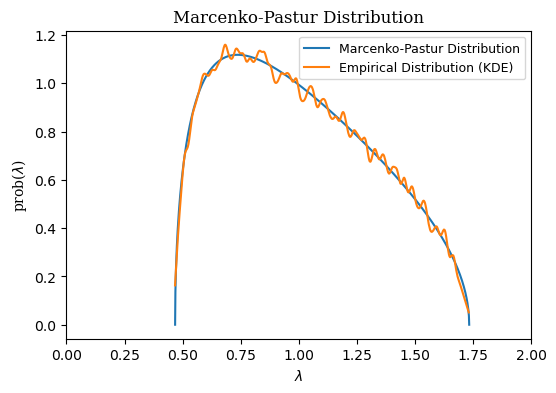

In [17]:
%run MarcenkoPastur.py

#### 3. Random Matrix with Signal

경험적 상관 행렬에서 모든 고유 벡터가 랜덤하지 않을 수 있다 (사실 대부분의 경우에서 고유 벡터는 랜덤하지 않을 것이다)

대부분의 금융시장에서는 신호는 약하고, 잡음은 굉장이 클 것이다. 랜덤 공분산 행렬에 신호를 추가하여 비교해 보자

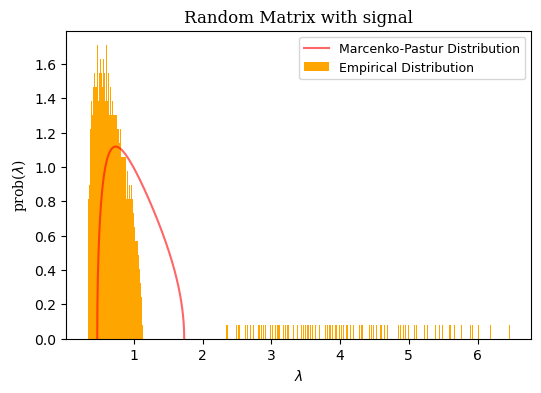

In [50]:
%run RandomMatrixWithSignal.py

고유값이 2가 넘어가는 부분이 signal, 이하 분포는 잡음이다. 랜덤 공분산 행렬에 비해서 분포 자체는 왼쪽으로 치중되어 있고 signal에 대한 고유값은 오른쪽에 분포되어 있다

#### 4. Fitting the Marcenko–Pastur Distribution

분산의 일부만이 랜덤 고유 벡터에 의해 야기되기 때문에 변동성 $\sigma^2$를 $\sigma^2(1 - \lambda_+/N)$등으로 대체할 수 있다. 실제로 $f(\lambda)$라는 함수를 고유값의 경험적 분포에 적합화하여 내재 변동성을 도출할 수 있다

이런 식으로 상관계수 행렬의 랜덤 고유 벡터로 설명되는 분산을 얻을 수 있고, 도출된 분산으로 랜덤이 아닌 고유벡터의 존재를 고려한 significance level $\lambda_+$를 결정할 수 있다

sse:739.8944084898271
sse:739.8943138781942
sse:287.83750987806746
sse:287.8375060931601
sse:279.9297815543926
sse:279.9297860098007
sse:234.97987396713512
sse:234.97988125657898
sse:159.56102993978857
sse:159.56099595051427
sse:189.33060178550943
sse:189.33061150449691
sse:19.47756860689883
sse:19.4775723289699
sse:17.4810216633822
sse:17.481022319138603
sse:114.80222090050015
sse:114.80219212186304
sse:17.425737949890287
sse:17.42573807905915
sse:17.42354144060335
sse:17.423541438778408
sse:17.423541002771366
sse:17.423541002776453
sse:17.423541002770634
sse:17.423541002770506
found errPDFs0.6760738228641755


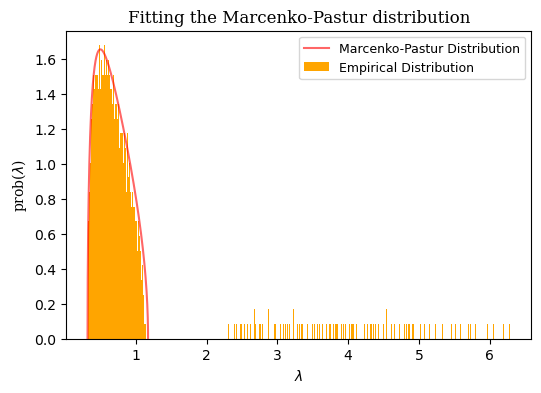

In [60]:
%run FittingMarcenkoPastur.py

적합화된 분산의 약 32.32%만이 신호에서 기인함을 볼 수 있으며, 이 절차를 통해 잡음과 관련된 고유값을 신호와 관련된 고유값에서 분리할 수 있었다

#### 5. Denoising

empirical finance에서 대부분의 경우 공분산을 축소하여 사용하는 것이 일반적이다. 그러나 차원의 축소는 잡음 뿐만 아니라 신호 또한 구분하지 않고 조건의 수를 감소시킨다. 안그래도 약한 신호를 축소를 통해 더욱 약하게 만들 수도 있다

이번 절에서는 상관 행렬의 잡음 제거에 이 정보를 사용하는 방법에 대해 논한다

**5.1 Constant Residual Eigenvalue Method**

이 접근 방식은 모든 랜덤 고유 벡터에 대해 상수 고유값을 설정하는데에 있다. $\{\lambda_n\}_{n=1, \dots, N}$은 모든 고유값의 집합이며, 내림차순이며, $i$는 $\lambda_i > \lambda_+$와 $\lambda_{i+1} \leq \lambda_+$가 되는 고유값의 위치가 된다. 그런 다음 $\lambda_j = frac{1}{N-i} \sum_{k = i+1}^N \lambda_k, j = i+1, \dots, N$을 설정해 상관 행렬의 대각합을 보존한다. 고유 벡터 분해 $VW = W\Lambda$가 주어질 때 다음과 같이 잡음이 제거된 상관행렬 $C_1$을 형성한다

$$\tilde C_1 = W \tilde\Lambda W^\prime$$
$$C_1 = \tilde C_1\Big[ \big(\mbox{diag}[\tilde C_1]\big)^\frac{1}{2}
\big(\mbox{diag}[\tilde C_1]\big)^{\frac{1}{2} \prime}\Big]^{-1}$$

sse:756.1800075340029
sse:756.1799129901215
sse:286.522853839576
sse:286.52284987818206
sse:278.31205815077493
sse:278.31206241794837
sse:229.0674906126626
sse:229.06749810184317
sse:238.99658462339931
sse:238.99654179107935
sse:43.38476354788887
sse:43.38477389634663
sse:18.576797616929657
sse:18.576799778728294
sse:5847.962111621786
sse:5847.961523835061
sse:77.67358656081863
sse:77.67356394893044
sse:17.932228351350105
sse:17.932228706542674
sse:17.91520631685545
sse:17.91520630178092
sse:17.915175869846294
sse:17.91517586994398
sse:17.91517586861593
sse:17.915175868616004
found errPDFs0.6791465058498752


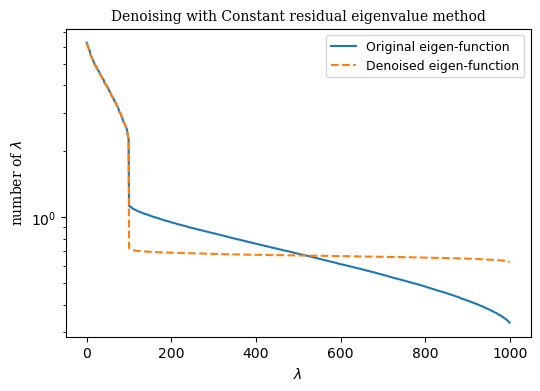

In [79]:
%run ConstantResidual.py